In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
train_d=pd.read_csv("train_house price prdiction_kaggle.csv")
test_d=pd.read_csv("test_house price prdiction_kaggle.csv")

In [6]:
train_d.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_d.shape

(1460, 81)

In [9]:
train_d.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [110]:
train_d.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [14]:
#univarient anlaysis
train_d.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [55]:
# train_d.columns(dtype='Object')
quantative=[f for f in train_d.columns if train_d.dtypes[f]==object]
print("total number of quantative varibale is", len(quantative)) 
print(quantative)

total number of quantative varibale is 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


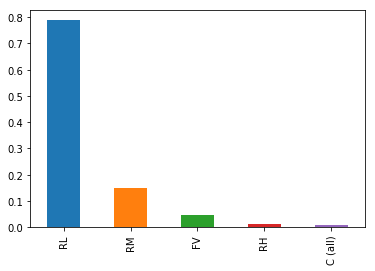

In [24]:
x=train_d.MSZoning.value_counts()
print(x)
####
y=train_d.MSZoning.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')



In [48]:
x=train_d.MSZoning.value_counts()
print(x)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


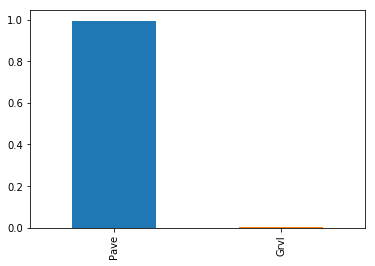

In [25]:
x=train_d.Street.value_counts()
print(x)
####
y=train_d.Street.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

Grvl    50
Pave    41
Name: Alley, dtype: int64
Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64


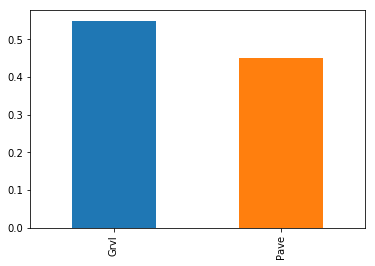

In [26]:
x=train_d.Alley.value_counts()
print(x)
####
y=train_d.Alley.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


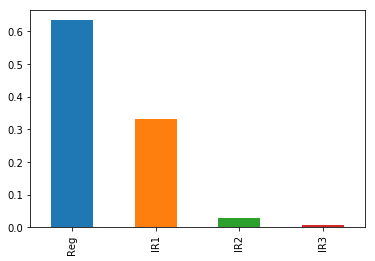

In [27]:
x=train_d.LotShape.value_counts()
print(x)
####
y=train_d.LotShape.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


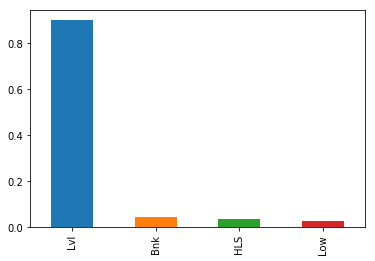

In [29]:
x=train_d.LandContour.value_counts()
print(x)
####
y=train_d. LandContour.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

In [ ]:
x=train_d.LotShape.value_counts()
print(x)
####
y=train_d.LotShape.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

1460
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


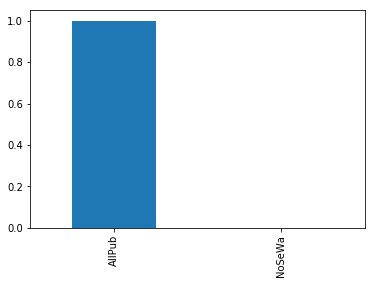

In [31]:
c=train_d.Utilities.count()
print(c)
x=train_d.Utilities.value_counts()
print(x)
####
y=train_d.Utilities.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


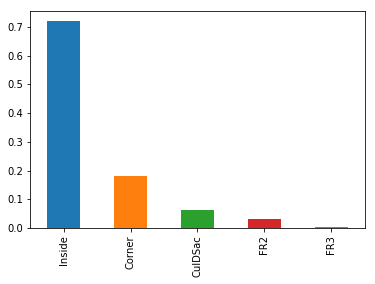

In [32]:
x=train_d.LotConfig.value_counts()
print(x)
####
y=train_d.LotConfig.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


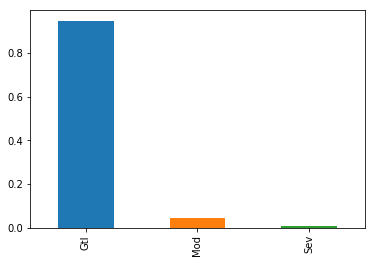

In [33]:
x=train_d.LandSlope.value_counts()
print(x)
####
y=train_d.LandSlope.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64 



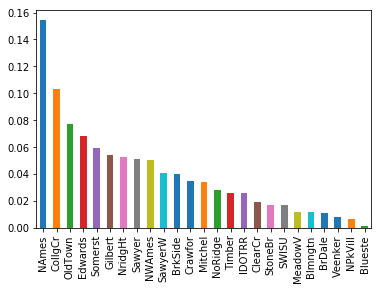

In [47]:
x=train_d.Neighborhood.value_counts()
print(x,'\n')
####
y=train_d.Neighborhood.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64 

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64 



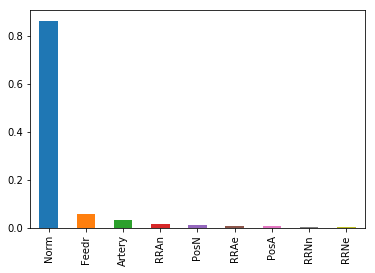

In [46]:
x=train_d.Condition1.value_counts()
print(x,'\n')

y=train_d.Condition1.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
Norm      0.989726
Feedr     0.004110
PosN      0.001370
RRNn      0.001370
Artery    0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64


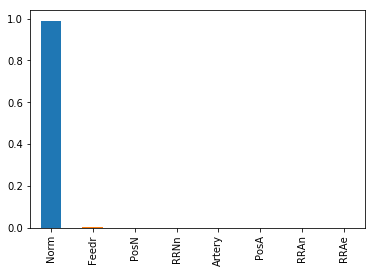

In [38]:
x=train_d.Condition2.value_counts()
print(x)
####
y=train_d.Condition2.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64


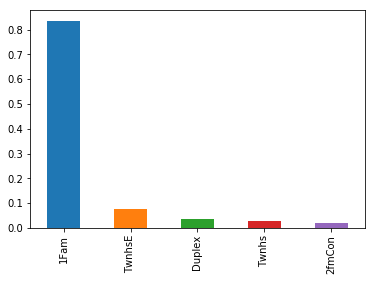

In [40]:
x=train_d.BldgType.value_counts()
print(x)
####
y=train_d.BldgType.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64


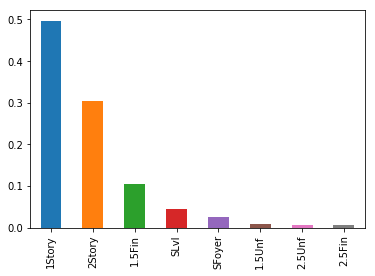

In [41]:
x=train_d.HouseStyle.value_counts()
print(x)
####
y=train_d.HouseStyle.value_counts(normalize=True)
print(y)
#########
y.plot(kind='bar')

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64 

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64 



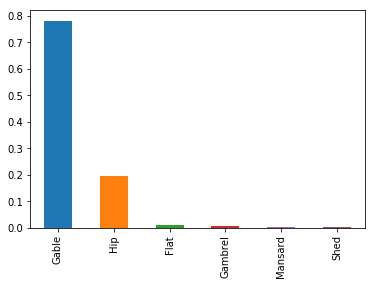

In [56]:
x=train_d.RoofStyle.value_counts()
print(x,'\n')
####
y=train_d.RoofStyle.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64 

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
ClyTile    0.000685
Roll       0.000685
Membran    0.000685
Name: RoofMatl, dtype: float64 



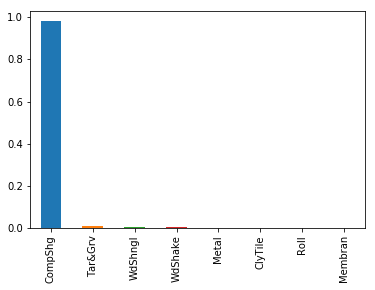

In [57]:
x=train_d.RoofMatl.value_counts()
print(x,'\n')
####
y=train_d.RoofMatl.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64 

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
Stone      0.001370
BrkComm    0.001370
CBlock     0.000685
AsphShn    0.000685
ImStucc    0.000685
Name: Exterior1st, dtype: float64 



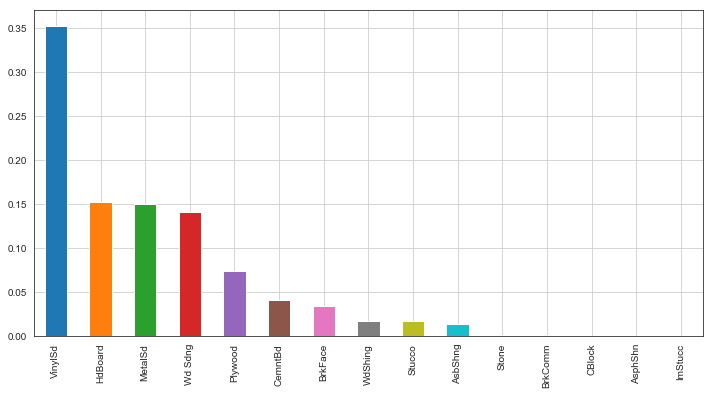

In [70]:
x=train_d.Exterior1st.value_counts()
print(x,'\n')
####
y=train_d.Exterior1st.value_counts(normalize=True)
print(y,'\n')
#########
plt.subplots(figsize=(12,6))
sns.set_style("whitegrid")
y.plot(kind='bar')

total_value= 1460
####################
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
***************************
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64 



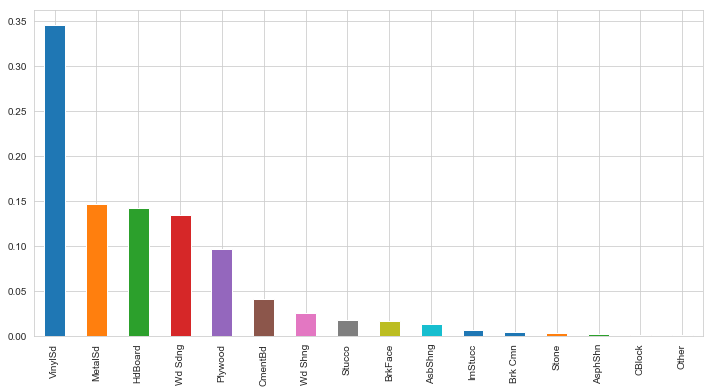

In [75]:
print('total_value=',train_d.Exterior2nd.count())
print('####################')
x=train_d.Exterior2nd.value_counts()
print(x)
print('***************************')
y=train_d.Exterior2nd.value_counts(normalize=True)
print(y,'\n')
#########
plt.subplots(figsize=(12,6))
y.plot(kind='bar')


total_value= 1452
####################
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

***************************
None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64 



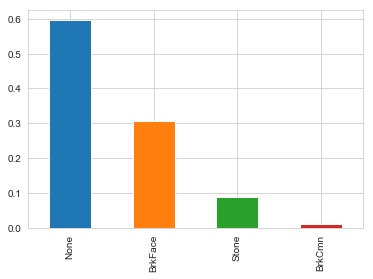

In [76]:
print('total_value=',train_d.MasVnrType.count())
print('####################')
x=train_d.MasVnrType.value_counts()
print(x,'\n')
print('***************************')
y=train_d.MasVnrType.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64 

***************************
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64 



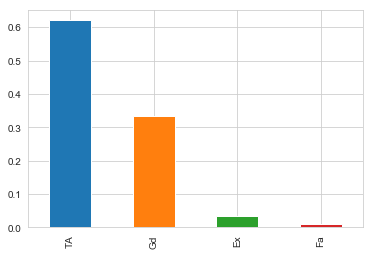

In [77]:
print('total_value=',train_d.ExterQual.count())
print('####################')
x=train_d.ExterQual.value_counts()
print(x,'\n')
print('***************************')
y=train_d.ExterQual.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64 

***************************
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64 



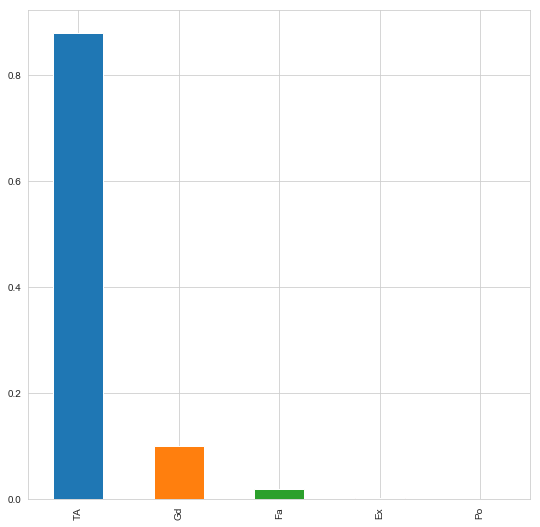

In [80]:
print('total_value=',train_d.ExterCond.count())
print('####################')
x=train_d.ExterCond.value_counts()
print(x,'\n')
print('***************************')
y=train_d.ExterCond.value_counts(normalize=True)
print(y,'\n')
#########
plt.subplots(figsize=(9,9))
y.plot(kind='bar')

total_value= 1423
####################
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 

***************************
TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64 



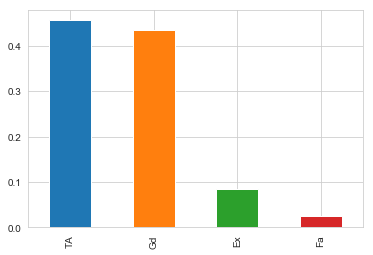

In [83]:
print('total_value=',train_d.BsmtQual.count())
print('####################')
x=train_d.BsmtQual.value_counts()
print(x,'\n')
print('***************************')
y=train_d.BsmtQual.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64 

***************************
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64 



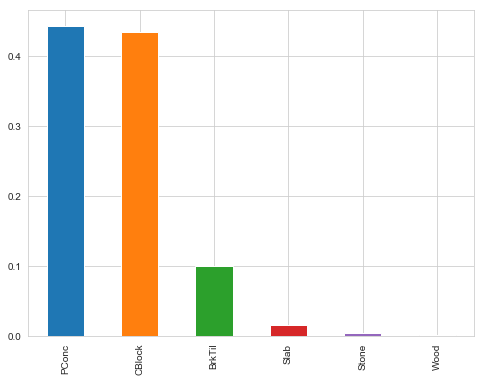

In [82]:
print('total_value=',train_d.Foundation.count())
print('####################')
x=train_d.Foundation.value_counts()
print(x,'\n')
print('***************************')
y=train_d.Foundation.value_counts(normalize=True)
print(y,'\n')
#########
plt.subplots(figsize=(8,6))
y.plot(kind='bar')

total_value= 1423
####################
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

***************************
TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64 



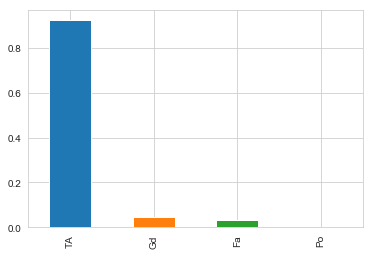

In [84]:
print('total_value=',train_d.BsmtCond.count())
print('####################')
x=train_d.BsmtCond.value_counts()
print(x,'\n')
print('***************************')
y=train_d.BsmtCond.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1422
####################
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 

***************************
No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64 



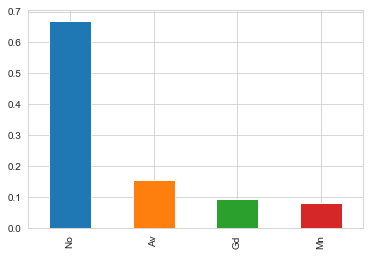

In [85]:
print('total_value=',train_d.BsmtExposure.count())
print('####################')
x=train_d.BsmtExposure.value_counts()
print(x,'\n')
print('***************************')
y=train_d.BsmtExposure.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1423
####################
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 

***************************
Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64 



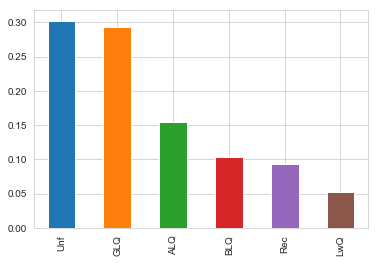

In [86]:
print('total_value=',train_d.BsmtFinType1.count())
print('####################')
x=train_d.BsmtFinType1.value_counts()
print(x,'\n')
print('***************************')
y=train_d.BsmtFinType1.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1422
####################
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

***************************
Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64 



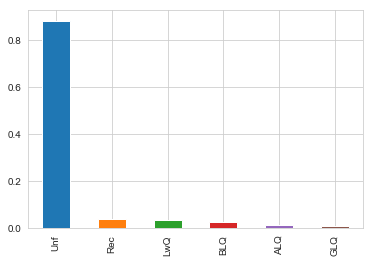

In [87]:
print('total_value=',train_d.BsmtFinType2.count())
print('####################')
x=train_d.BsmtFinType2.value_counts()
print(x,'\n')
print('***************************')
y=train_d.BsmtFinType2.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64 

***************************
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64 



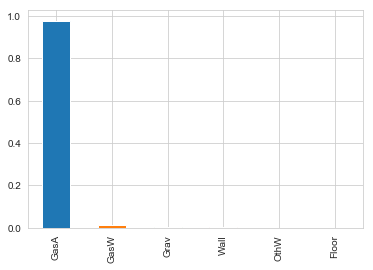

In [88]:
print('total_value=',train_d.Heating.count())
print('####################')
x=train_d.Heating.value_counts()
print(x,'\n')
print('***************************')
y=train_d.Heating.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64 

***************************
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64 



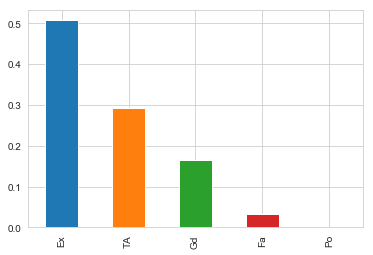

In [89]:
print('total_value=',train_d.HeatingQC.count())
print('####################')
x=train_d.HeatingQC.value_counts()
print(x,'\n')
print('***************************')
y=train_d.HeatingQC.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
Y    1365
N      95
Name: CentralAir, dtype: int64 

***************************
Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64 



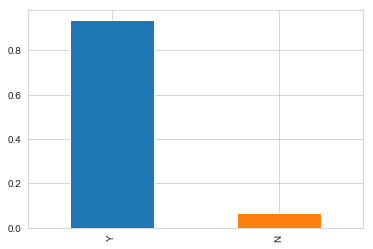

In [90]:
print('total_value=',train_d.CentralAir.count())
print('####################')
x=train_d.CentralAir.value_counts()
print(x,'\n')
print('***************************')
y=train_d.CentralAir.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1459
####################
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 

***************************
SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64 



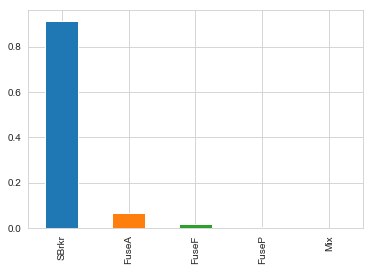

In [91]:
print('total_value=',train_d.Electrical.count())
print('####################')
x=train_d.Electrical.value_counts()
print(x,'\n')
print('***************************')
y=train_d.Electrical.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64 

***************************
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64 



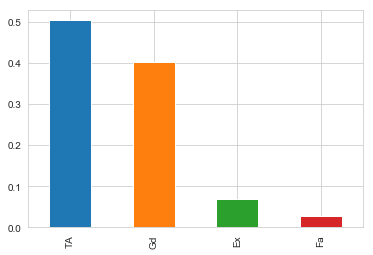

In [92]:
print('total_value=',train_d.KitchenQual.count())
print('####################')
x=train_d.KitchenQual.value_counts()
print(x,'\n')
print('***************************')
y=train_d.KitchenQual.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64 

***************************
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64 



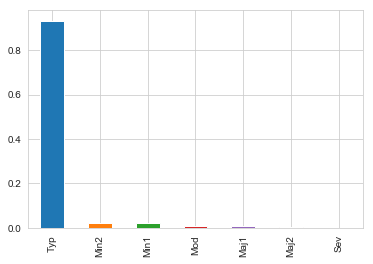

In [93]:
print('total_value=',train_d.Functional.count())
print('####################')
x=train_d.Functional.value_counts()
print(x,'\n')
print('***************************')
y=train_d.Functional.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 770
####################
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64 

***************************
Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: FireplaceQu, dtype: float64 



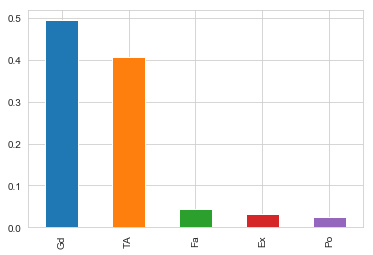

In [94]:
print('total_value=',train_d.FireplaceQu.count())
print('####################')
x=train_d.FireplaceQu.value_counts()
print(x,'\n')
print('***************************')
y=train_d.FireplaceQu.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1379
####################
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

***************************
Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64 



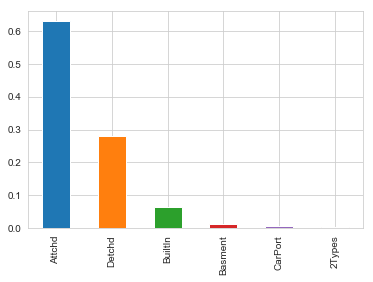

In [95]:
print('total_value=',train_d.GarageType.count())
print('####################')
x=train_d.GarageType.value_counts()
print(x,'\n')
print('***************************')
y=train_d.GarageType.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1379
####################
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

***************************
Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64 



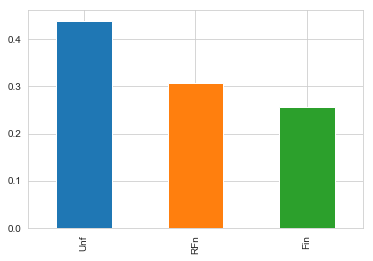

In [96]:
print('total_value=',train_d.GarageFinish.count())
print('####################')
x=train_d.GarageFinish.value_counts()
print(x,'\n')
print('***************************')
y=train_d.GarageFinish.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1379
####################
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

***************************
TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64 



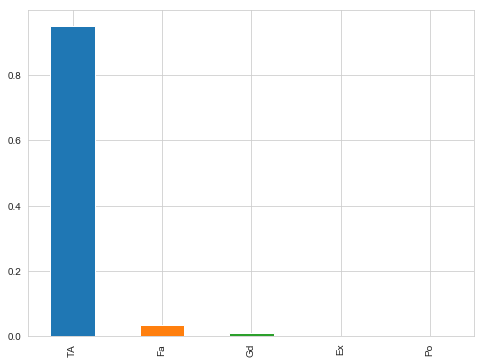

In [98]:
print('total_value=',train_d.GarageQual.count())
print('####################')
x=train_d.GarageQual.value_counts()
print(x,'\n')
print('***************************')
y=train_d.GarageQual.value_counts(normalize=True)
print(y,'\n')
#########
plt.subplots(figsize=(8,6))
y.plot(kind='bar')

total_value= 1379
####################
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 

***************************
TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64 



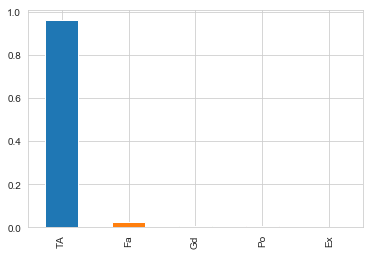

In [99]:
print('total_value=',train_d.GarageCond.count())
print('####################')
x=train_d.GarageCond.value_counts()
print(x,'\n')
print('***************************')
y=train_d.GarageCond.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64 

***************************
Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64 



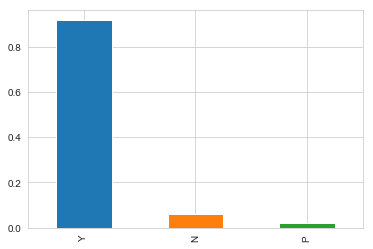

In [100]:
print('total_value=',train_d.PavedDrive.count())
print('####################')
x=train_d.PavedDrive.value_counts()
print(x,'\n')
print('***************************')
y=train_d.PavedDrive.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 7
####################
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64 

***************************
Gd    0.428571
Ex    0.285714
Fa    0.285714
Name: PoolQC, dtype: float64 



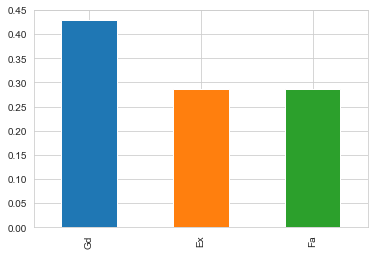

In [101]:
print('total_value=',train_d.PoolQC.count())
print('####################')
x=train_d.PoolQC.value_counts()
print(x,'\n')
print('***************************')
y=train_d.PoolQC.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 281
####################
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64 

***************************
MnPrv    0.558719
GdPrv    0.209964
GdWo     0.192171
MnWw     0.039146
Name: Fence, dtype: float64 



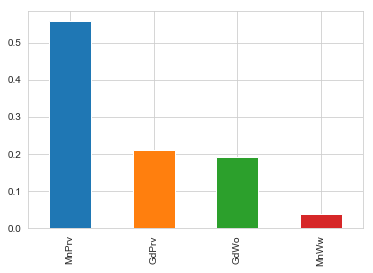

In [102]:
print('total_value=',train_d.Fence.count())
print('####################')
x=train_d.Fence.value_counts()
print(x,'\n')
print('***************************')
y=train_d.Fence.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 54
####################
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64 

***************************
Shed    0.907407
Gar2    0.037037
Othr    0.037037
TenC    0.018519
Name: MiscFeature, dtype: float64 



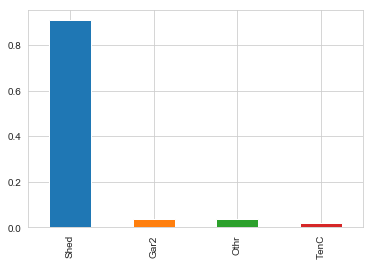

In [103]:
print('total_value=',train_d.MiscFeature.count())
print('####################')
x=train_d.MiscFeature.value_counts()
print(x,'\n')
print('***************************')
y=train_d.MiscFeature.value_counts(normalize=True)
print(y,'\n')
#########
y.plot(kind='bar')

total_value= 1460
####################
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64 

***************************
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64 



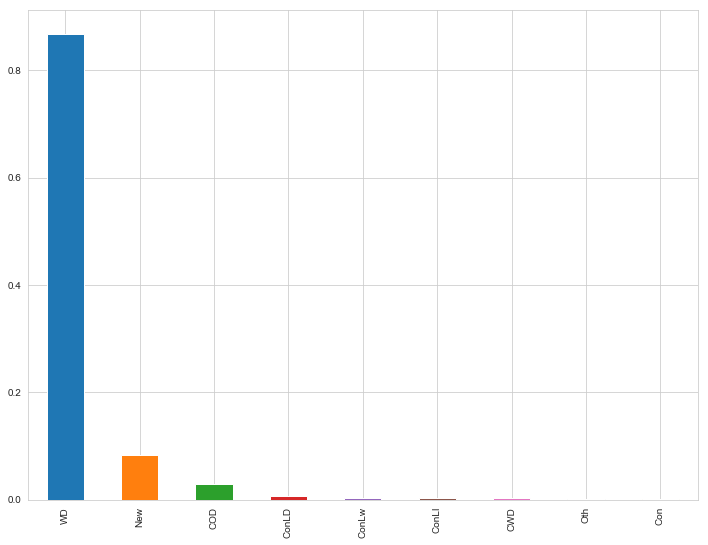

In [106]:
print('total_value=',train_d.SaleType.count())
print('####################')
x=train_d.SaleType.value_counts()
print(x,'\n')
print('***************************')
y=train_d.SaleType.value_counts(normalize=True)
print(y,'\n')
#########
plt.subplots(figsize=(12,9))
y.plot(kind='bar')

total_value= 1460
####################
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64 

***************************
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64 



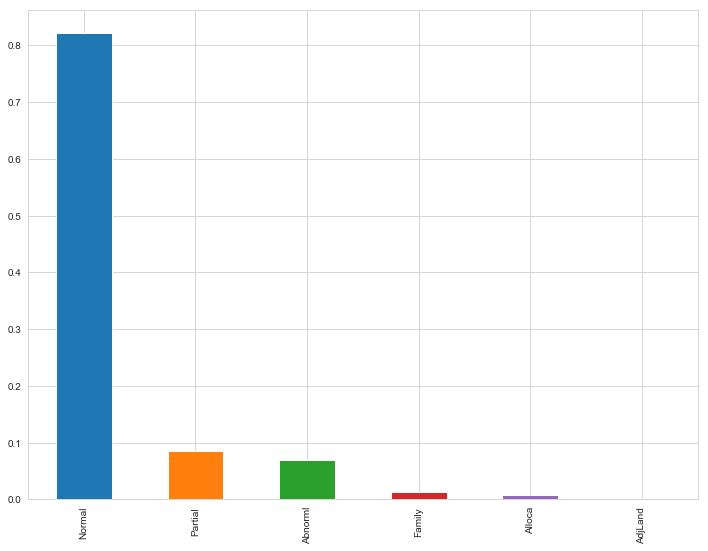

In [108]:
print('total_value=',train_d.SaleCondition.count())
print('####################')
x=train_d.SaleCondition.value_counts()
print(x,'\n')
print('***************************')
y=train_d.SaleCondition.value_counts(normalize=True)
print(y,'\n')
#########
plt.subplots(figsize=(12,9))
y.plot(kind='bar')

In [109]:
#columna having numerical values
quantative=[f for f in train_d.columns if train_d.dtypes[f]!=object]
print("total number of quantative varibale is", len(quantative)) 
print(quantative)

total number of quantative varibale is 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [179]:
quantative=[f for f in train_d.columns if train_d.dtypes[f]==object]
print("total number of quantative varibale is", len(quantative)) 
print(quantative)

total number of quantative varibale is 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


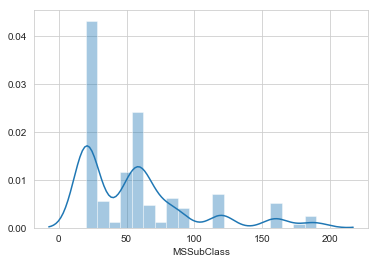

In [112]:
sns.distplot(train_d.MSSubClass)

ValueError: cannot convert float NaN to integer

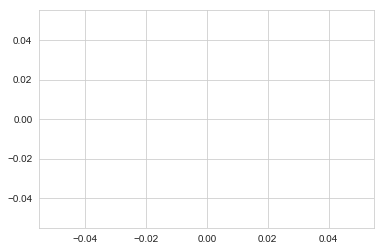

In [115]:
sns.distplot(train_d.LotFrontage)

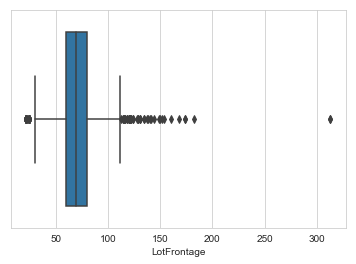

In [116]:
sns.boxplot(train_d.LotFrontage)

ValueError: cannot convert float NaN to integer

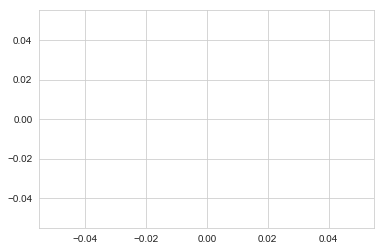

In [117]:
sns.distplot(train_d.MasVnrArea)

In [108]:
train_d.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [181]:
sns.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

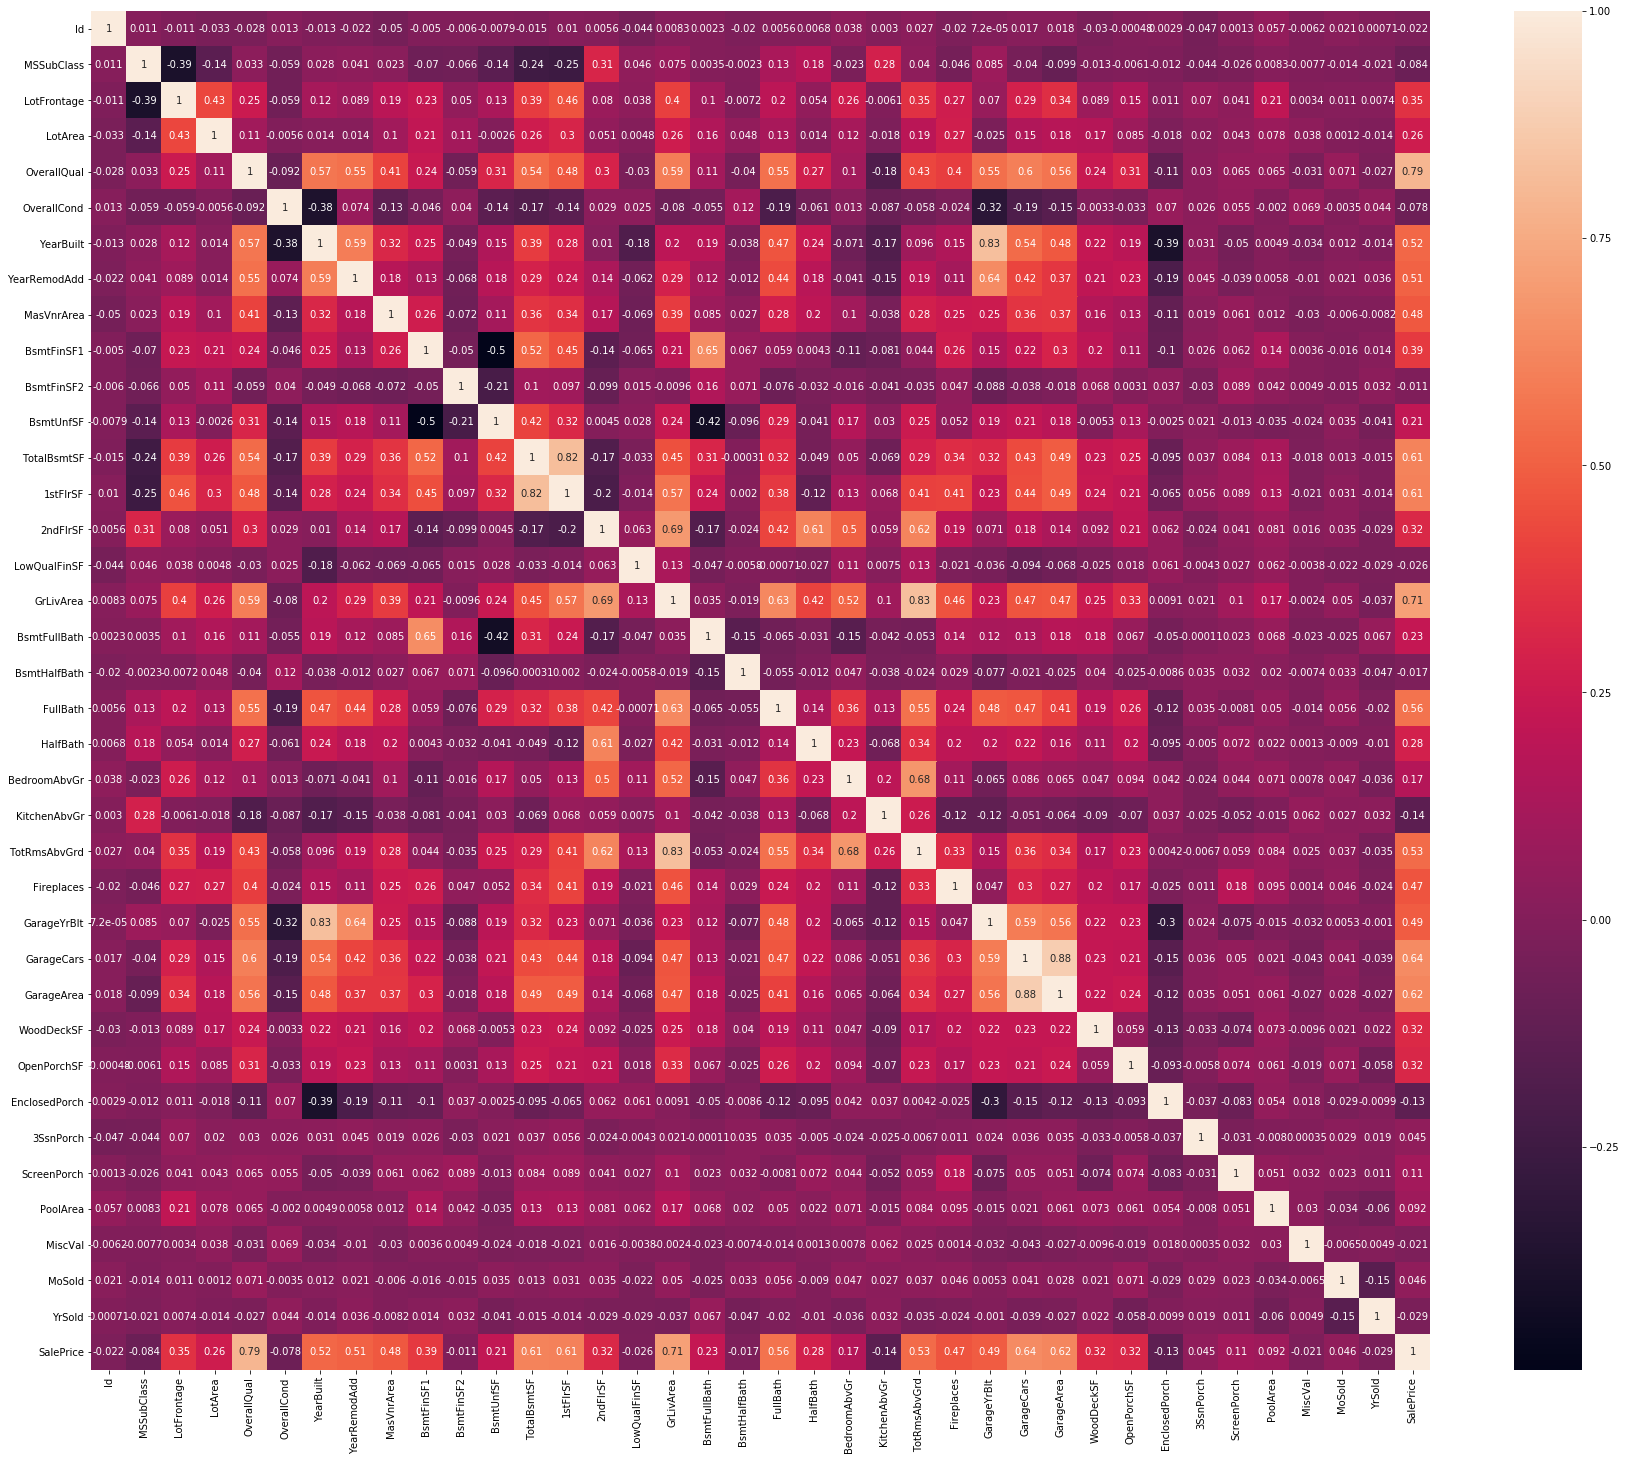

In [111]:
matrix=train_d.corr()
plt.subplots(figsize=(30,25))
sns.heatmap(matrix,annot=True)

In [113]:
target=abs(matrix['SalePrice'])
pos_corr=target[target>0.5]
neg_corr=target[target<0]
pos_corr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

SalePrice    34900   35311   37900   39300   40000   52000   52500   55000   \
OverallQual                                                                   
1                 0       0       0       1       0       0       0       0   
2                 0       1       0       0       0       0       0       0   
3                 0       0       1       0       0       1       0       0   
4                 1       0       0       0       1       0       1       2   
5                 0       0       0       0       0       0       0       0   
6                 0       0       0       0       0       0       0       0   
7                 0       0       0       0       0       0       0       0   
8                 0       0       0       0       0       0       0       0   
9                 0       0       0       0       0       0       0       0   
10                0       0       0       0       0       0       0       0   

SalePrice    55993   58500    ...    485000  501837

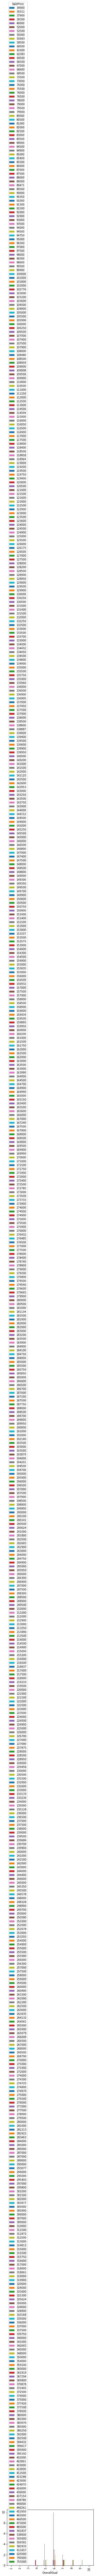

In [9]:
gd=pd.crosstab(index=train_d['OverallQual'],columns=train_d.SalePrice,dropna=True)
# print(gd)
gd.plot(kind='bar')

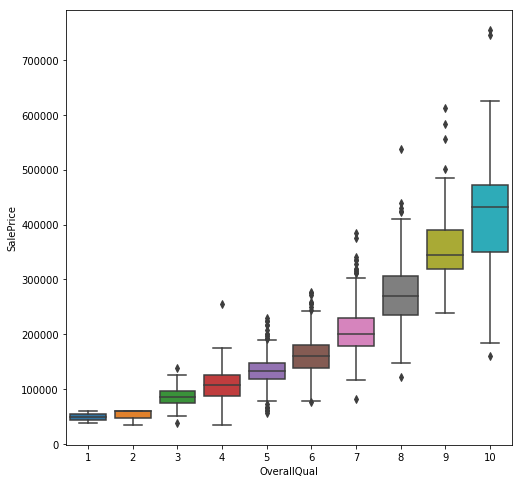

In [6]:
plt.subplots(figsize=(8,8))
sns.boxplot(x=train_d['OverallQual'],y=train_d['SalePrice'])
plt.show()

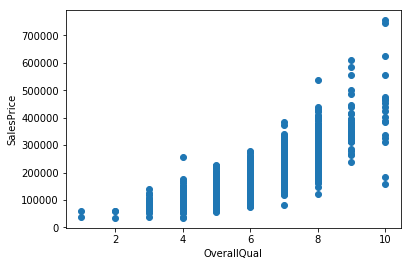

In [11]:
plt.scatter(x=train_d['OverallQual'],y=train_d['SalePrice'])
plt.xlabel("OverallQual")
plt.ylabel("SalesPrice")
plt.show()

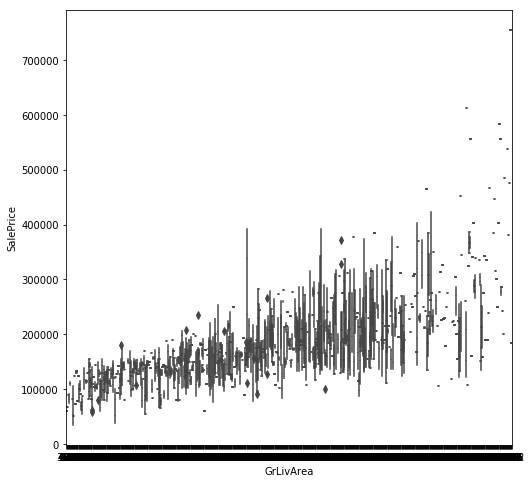

In [14]:
plt.subplots(figsize=(8,8))
sns.boxplot(x=train_d['GrLivArea'],y=train_d['SalePrice'])
plt.show()

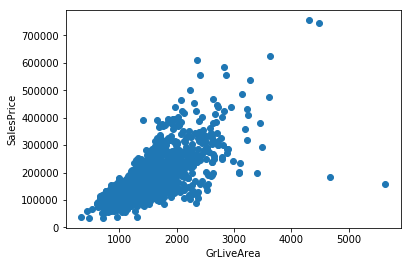

In [12]:
plt.scatter(x=train_d['GrLivArea'],y=train_d['SalePrice'])
plt.xlabel("GrLiveArea")
plt.ylabel("SalesPrice")
plt.show()

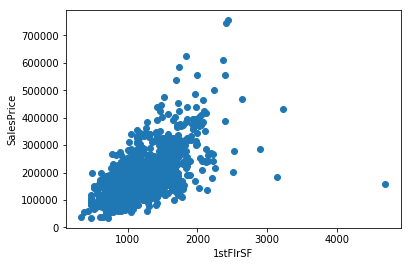

In [16]:

plt.scatter(x=train_d['1stFlrSF'],y=train_d['SalePrice'])
plt.xlabel("1stFlrSF")
plt.ylabel("SalesPrice")
plt.show()

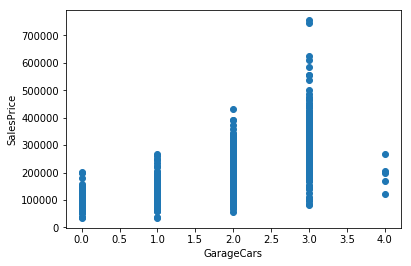

In [114]:
plt.scatter(x=train_d['GarageCars'],y=train_d['SalePrice'])
plt.xlabel("GarageCars")
plt.ylabel("SalesPrice")
plt.show()

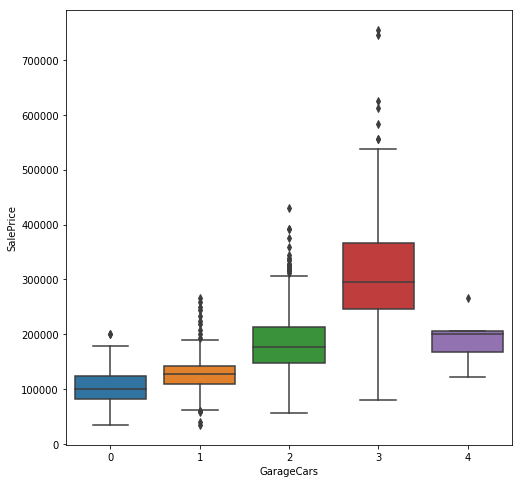

In [115]:
plt.subplots(figsize=(8,8))
sns.boxplot(x=train_d['GarageCars'],y=train_d['SalePrice'])
plt.show()

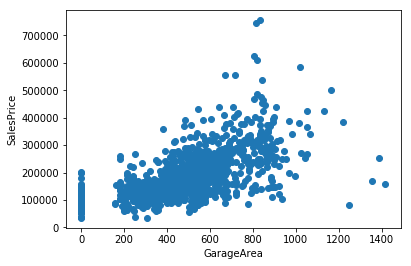

In [116]:
plt.scatter(x=train_d['GarageArea'],y=train_d['SalePrice'])
plt.xlabel("GarageArea")
plt.ylabel("SalesPrice")
plt.show()

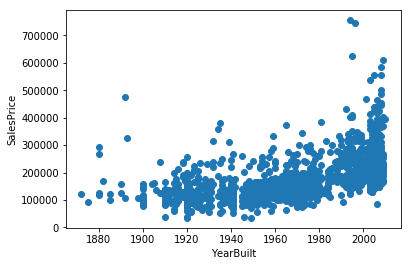

In [117]:
plt.scatter(x=train_d['YearBuilt'],y=train_d['SalePrice'])
plt.xlabel("YearBuilt")
plt.ylabel("SalesPrice")
plt.show()

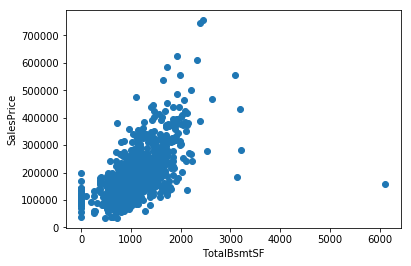

In [15]:
plt.scatter(x=train_d['TotalBsmtSF'],y=train_d['SalePrice'])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalesPrice")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


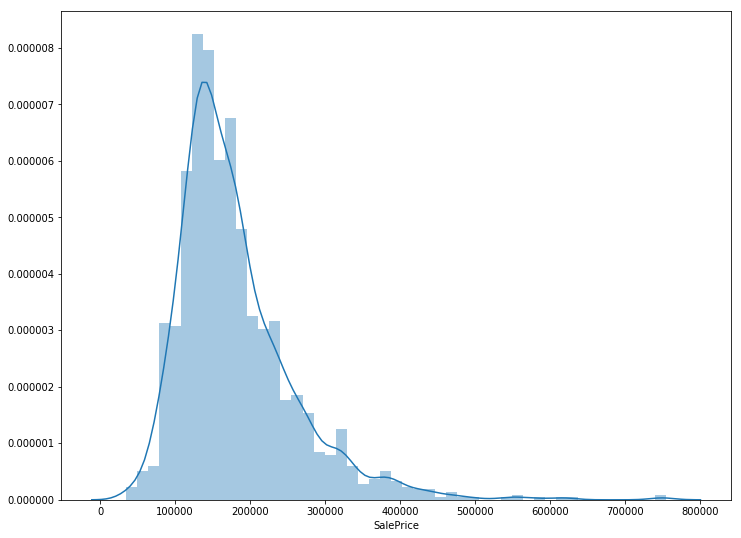

In [18]:
plt.subplots(figsize=(12, 9))
sns.distplot(train_d.SalePrice)

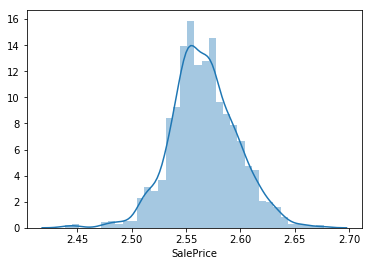

In [22]:
train_d['SalePrice']=np.log1p(train_d['SalePrice'])
sns.distplot(train_d['SalePrice'])

In [141]:
train_d.drop(train_d[(train_d['OverallQual']<5) & (train_d['SalePrice']>200000)].index,inplace=True)

train_d.drop(train_d[(train_d['GrLivArea']>4000) & (train_d['SalePrice']<300000)].index,inplace=True)
train_d.drop(train_d[(train_d['1stFlrSF']>4000) & (train_d['SalePrice']<300000)].index,inplace=True)
train_d.drop(train_d[(train_d['TotalBsmtSF']>5000) & (train_d['SalePrice']<300000)].index,inplace=True)
train_d.drop(train_d[(train_d['GarageCars']>28000) & (train_d['SalePrice']>650000)].index,inplace=True)
train_d.drop(train_d[(train_d['YearBuilt']>1900) & (train_d['SalePrice']>700000)].index,inplace=True)
train_d.reset_index(drop=True,inplace=True)

In [139]:
train_d['YrSold'].unique()
train_d['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    48
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    28
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1962.0    21
2009.0    21
1966.0    21
1965.0    21
2001.0    20
1970.0    20
1957.0    20
1960.0    19
1978.0    19
1997.0    19
1996.0    19
1954.0    18
1964.0    18
1974.0    18
          ..
1916.0     5
1936.0     5
1922.0     5
1928.0     4
1931.0     4
1935.0     4
1945.0     4
1946.0     4
1982.0     4
1923.0     3
1952.0     3
1938.0     3
1910.0     3
1924.0     3
1921.0     3
1932.0     3
2010.0     3
1918.0     2
1915.0     2
1914.0     2
1942.0     2
1937.0     2
1934.0     2
1929.0     2
1947.0     2
1908.0     1
1900.0     1
1933.0     1
1927.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [132]:
train_d['YrSold'].describe()

count    1455.000000
mean     2007.817182
std         1.329842
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [383]:
train_data=train_d.copy()
test_data=test_d.copy()
train_data.shape,test_d.shape

((1455, 81), (1459, 80))

In [120]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [52]:
test_data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [37]:
# train_data.drop('Id',axis=1,inplace=True)
# test_data.drop(['Id'],axis=1,inplace=True)
# print(train_data.shape)
# # print(test_data.shape)

KeyError: "['Id'] not found in axis"

In [365]:
null_values=train_d.isna().sum()
print(null_values[null_values>0])

LotFrontage      258
Alley           1364
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1450
Fence           1175
MiscFeature     1401
dtype: int64


In [366]:
test_null=test_d.isna().sum()
test_null=test_null[test_null>0]
print(test_null)
# test_null.dtype

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [384]:
train_data.FireplaceQu.value_counts()

Gd    377
TA    312
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64

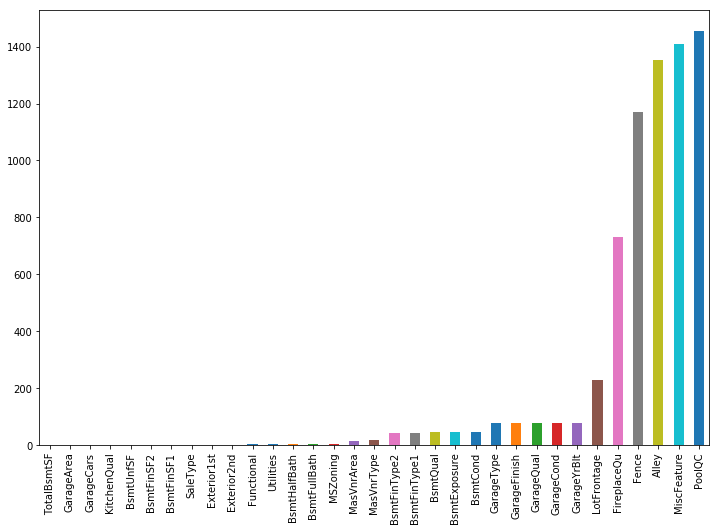

In [368]:
plt.subplots(figsize=(12,8))
test_null.sort_values(inplace=True)
test_null.plot(kind='bar')

In [370]:
# for i in test_data.cloumns:
ntr=[i for i in test_data.columns if test_data.dtypes[i]==object]
print(len(ntr))
print(ntr)
# t=ntr.to_list()

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [371]:
ntr1=[i for i in test_data.columns if test_data.dtypes[i]!=object]
print(len(ntr1))
print(ntr1)

37
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [352]:
# test_data.FireplaceQu.describe()
train_d.shape,test_data.shape,test_d.shape,print(type(ntr))

<class 'list'>


((1455, 81), (1459, 80), (1459, 80), None)

In [372]:
nt=['PoolQC', 'Fence', 'MiscFeature','Alley']
for i in nt:
     ntr.remove(i) 
print(len(ntr))


39


In [373]:
for i in ntr:
    test_data[i].fillna(test_data[i].mode()[0],inplace=True)
for i in nt:
     test_data[i].fillna('None',inplace=True)


In [374]:
test_null=test_data.isna().sum()
test_null=test_null[test_null>0]
test_null

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [375]:
test_data['GarageCars'].value_counts()
test_data['GarageCars'].fillna(test_data['GarageCars'].mode()[0],inplace=True)

test_data['BsmtFullBath'].value_counts()
test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0],inplace=True)

test_data['BsmtFinSF1'].value_counts()
test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mode()[0],inplace=True)

test_data['BsmtFinSF2'].value_counts()
test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mode()[0],inplace=True)

test_data['BsmtUnfSF'].value_counts()
test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mode()[0],inplace=True)

test_data['TotalBsmtSF'].value_counts()
test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mode()[0],inplace=True)

test_data['GarageArea'].value_counts()
test_data['GarageArea'].fillna(test_data['GarageArea'].mode()[0],inplace=True)
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(0)

In [376]:
test_null=test_data.isna().sum()
test_null=test_null[test_null>0]
test_null

LotFrontage    227
MasVnrArea      15
GarageYrBlt     78
dtype: int64

In [377]:
test_data.MasVnrArea.fillna(0,inplace=True)
test_data.LotFrontage.fillna(0,inplace=True)
test_data.GarageYrBlt.fillna(0,inplace=True)

In [359]:
 test_data.shape,train_data.shape

((1459, 80), (1455, 81))

In [378]:
#filling null values of categorical data
train_data.MSZoning.fillna(train_data['MSZoning'].mode()[0],inplace=True)
train_data.MasVnrType.fillna(train_data['MasVnrType'].mode()[0],inplace=True)
train_data.BsmtQual.fillna(train_data['BsmtQual'].mode()[0],inplace=True)
train_data.BsmtCond.fillna(train_data['BsmtCond'].mode()[0],inplace=True)
train_data.BsmtExposure.fillna(train_data['BsmtExposure'].mode()[0],inplace=True)
train_data.BsmtFinType1.fillna(train_data['BsmtFinType1'].mode()[0],inplace=True)
train_data.BsmtFinType2.fillna(train_data['BsmtFinType2'].mode()[0],inplace=True)
train_data.Electrical.fillna(train_data['Electrical'].mode()[0],inplace=True)
# train_data.FireplaceQu.fillna(train_data['FireplaceQu'].mode()[0],inplace=True)
train_data.GarageType.fillna(train_data['GarageType'].mode()[0],inplace=True)
train_data.GarageFinish.fillna(train_data['GarageFinish'].mode()[0],inplace=True)
train_data.GarageQual.fillna(train_data['GarageQual'].mode()[0],inplace=True)
train_data.GarageCond.fillna(train_data['GarageCond'].mode()[0],inplace=True)
#############
train_data.Alley.fillna('None',inplace=True)
train_data.PoolQC.fillna('None',inplace=True)
train_data.Fence.fillna('None',inplace=True)
train_data.MiscFeature.fillna('None',inplace=True)
train_data.FireplaceQu.fillna('None',inplace=True)

#filling others null values
train_data.MasVnrArea.fillna(0,inplace=True)
train_data.LotFrontage.fillna(0,inplace=True)
train_data.GarageYrBlt.fillna(0,inplace=True)
# train_data.GarageYrBlt.astype(int)

In [90]:
# train_data.MasVnrArea

# train_data.LotFrontage.fillna(0,inplace=True)

# train_data.LotFrontage

# train_data.GarageYrBlt.fillna(0,inplace=True)

# train_data.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
5       1993.0
6       2004.0
7       1973.0
8       1931.0
9       1939.0
10      1965.0
11      2005.0
12      1962.0
13      2006.0
14      1960.0
15      1991.0
16      1970.0
17      1967.0
18      2004.0
19      1958.0
20      2005.0
21      1930.0
22      2002.0
23      1976.0
24      1968.0
25      2007.0
26      2005.0
27      2008.0
28      1957.0
29      1920.0
         ...  
1430    2005.0
1431    1976.0
1432    1928.0
1433    2000.0
1434    1977.0
1435    1962.0
1436    1974.0
1437    2008.0
1438    1957.0
1439    1979.0
1440    1993.0
1441    2004.0
1442    2008.0
1443    1916.0
1444    2004.0
1445    1990.0
1446    1962.0
1447    1995.0
1448    1950.0
1449       0.0
1450       0.0
1451    2008.0
1452    2005.0
1453       0.0
1454    2004.0
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [158]:
#skewness
# skew_feature=train_data[numerics].apply(lambda x:skew(x)).sort_values(ascending=False)
skewed_feature=train_d[quantative].apply(lambda x:skew(x)).sort_values(ascending=False)
# high_skew=skewed_feature[skewed_feature>0.5]
# high_skew.head()

NameError: name 'quantative' is not defined

In [381]:
train_data.shape,test_data.shape,test_d.shape

((1455, 294), (1459, 275), (1459, 80))

In [345]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=293)


In [344]:
test_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

In [44]:
train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [144]:
x=train_data.drop('SalePrice',1)
y=train_data.SalePrice

In [380]:
x=pd.get_dummies(x)
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)
# x.GarageYrBlt

In [146]:
from sklearn.model_selection import train_test_split

# from sklearn.metrics import accuracy_score
# 
x_train,x_val,y_train,y_val=train_test_split( x,y,test_size=0.3)

In [147]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
y_predict=lr.predict(x_val)


In [148]:
#after removing outliars
y_predict=lr.predict(x_val)
accuracy=metrics.r2_score(y_val,y_predict)
accuracy

0.9210016700539945

In [342]:
predict=lr.predict(test_data)

ValueError: shapes (1459,276) and (292,) not aligned: 276 (dim 1) != 292 (dim 0)

In [105]:
from sklearn import metrics
accuracy=metrics.r2_score(y_val,y_predict)
accuracy

0.8763151737712339

In [106]:
metrics.mean_squared_error(y_val,lr_predict)

20310064843.37262

In [24]:
metrics.score(y_val,lr_predict)

AttributeError: module 'sklearn.metrics' has no attribute 'score'

In [27]:
lr.score(x_train,y_train)

0.9510248511740621

In [28]:
lr.score(x_val,lr_predict)

1.0

In [76]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 898 to 450
Columns: 289 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(252)
memory usage: 554.9 KB
